1. Train a single perceptron to learn two classes with two inputs x1 and x2. Assume that all the weights of the perceptron are initialized as 0, learning rate as 1. Show the calculation for each step. Plot all the samples and final decision boundary.

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [346]:
data = [[0.5, 3.0, 2], [1, 3.0, 2], [0.5, 2.5, 2], [1, 2.5, 2], [1.5, 2.5, 2], [4.5, 1, 1], [5, 1, 1], [4.5, 0.5, 1], [5.5, 0.5, 1]]
labels = []
learning_rate = 1
a = [0] * 3
data_vals = []
for d in data:
    data_vals.append([d[0], d[1]])
print(data_vals)

[[0.5, 3.0], [1, 3.0], [0.5, 2.5], [1, 2.5], [1.5, 2.5], [4.5, 1], [5, 1], [4.5, 0.5], [5.5, 0.5]]


In [347]:
for d in data:
    if d[2] == 2:
        labels.append(2)
        d[2] = -1
        d[0] = -1 * d[0]
        d[1] = -1 * d[1]
    else:
        labels.append(1)
        d[2] = 1

data = np.array(data)

print(data)
print(labels)

[[-0.5 -3.  -1. ]
 [-1.  -3.  -1. ]
 [-0.5 -2.5 -1. ]
 [-1.  -2.5 -1. ]
 [-1.5 -2.5 -1. ]
 [ 4.5  1.   1. ]
 [ 5.   1.   1. ]
 [ 4.5  0.5  1. ]
 [ 5.5  0.5  1. ]]
[2, 2, 2, 2, 2, 1, 1, 1, 1]


In [348]:
#Function for the perceptron function
def perceptron(a, data):
    i = 0
    #To count the positive values of the multiplication
    count = 0
    while True:

        #Transpose of the weight vector
        transa = np.transpose(a)

        #Matrix multiplication between the weight vector and the feature vector
        err = transa @ data[i]

        #IF the product is greater than zero just continue
        if(err > 0):
            count += 1    

        #If the product is negative, update the weight vector and continue
        if(err <= 0):
            count = 0
            a = a + learning_rate * data[i]
        
        #Once all the products are positive the criterion is meet, so we just break the loop
        if(count == len(data)):
            break
        
        i += 1
        i  = i % len(data)
    weight = np.array([a[0], a[1]])
    print(weight)
    bias = a[2]

    return lambda x: x.T @ weight + bias

In [349]:
a = np.array([0, 0, 0])
result = perceptron(a, data)
print(result(np.array([0.5, 1])))

[ 2.5 -4.5]
-4.25


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 100)

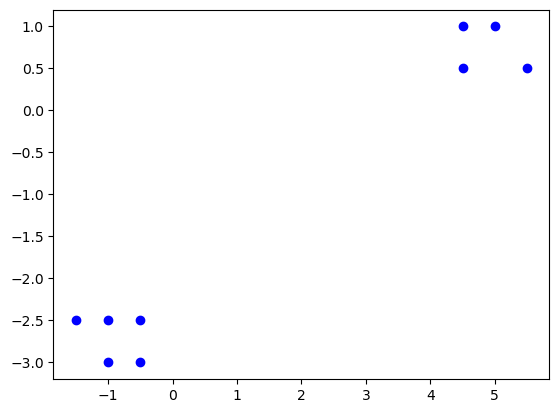

In [350]:
# Plot the data points
for d in data:
    if d[2] == 2:
        plt.scatter(d[0], d[1], color = 'red')
    
    else:
        plt.scatter(d[0], d[1], color = 'blue')

# Plot the decision boundary
x_values = np.linspace(min(data_vals, key=lambda x: x[0])[0] - 1, max(data_vals, key=lambda x: x[0])[0] + 1, 100)
y_values = []
for d in data_vals:
    y_values.append(result(x_values))

y_values = np.array(y_values)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (9,)

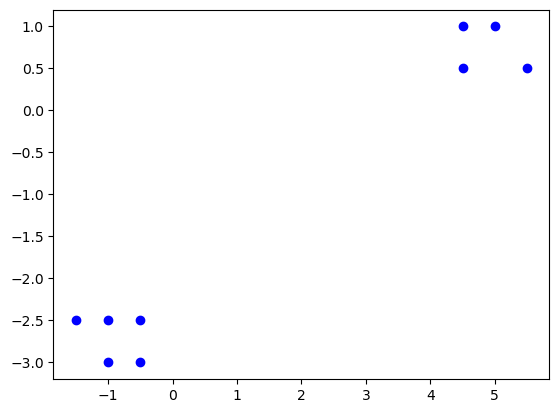

In [344]:
# Plot the data points
for d in data:
    if d[2] == 2:
        plt.scatter(d[0], d[1], color = 'red')
    
    else:
        plt.scatter(d[0], d[1], color = 'blue')

# Plot the decision boundary
x_values = np.linspace(min(data_vals, key=lambda x: x[0])[0] - 1, max(data_vals, key=lambda x: x[0])[0] + 1, 100)
y_values = []
for d in data_vals:
    y_values.append(result(np.array(d)))

y_values = np.array(y_values)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()